# This notebook demonstrates the model

load the model and define the confidence values

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scored.prediction.predictor import DartPredictor
from scored.board.dartboard import DartBoard

conf = .8
resolution = 1000

board = DartBoard(resolution)
model_path = "../models/v2/best.pt"
predictor = DartPredictor(board, model_path, conf)

let the model predict the scores and visualize the result

E:\Projekte\Python\Scored\src\scored\draw\plot.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(top_left, bb.width, bb.height, **kwargs))


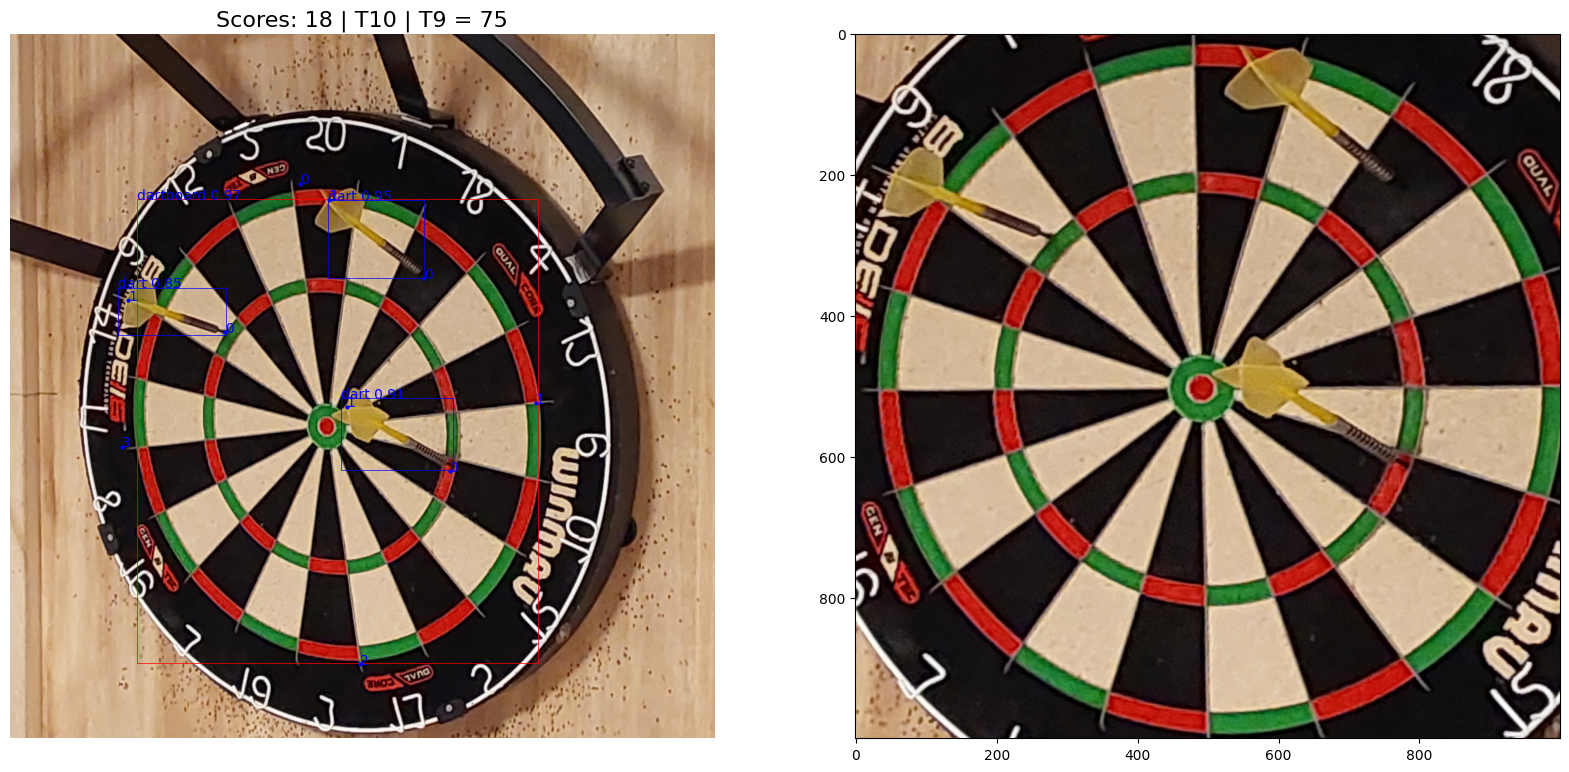

In [10]:
import cv2
from matplotlib import pyplot as plt

from scored.prediction.perspective import warp_image
from scored.draw.plot import draw_prediction

img_path = "../dataset/v3/20250319_143937.jpg"

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
dart_prediction = predictor.predict(image, verbose=False)

warped_image = warp_image(dart_prediction.matrix, image, board.shape())

_, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(image)

draw_prediction(axes[0], dart_prediction)

_ = axes[1].imshow(warped_image)